Project 8: Food Price Inflation

Food inflation directly affects household expenses and overall cost of living.<br>
The focus is on identifying trends, volatility, and category-wise price behavior.<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')

The dataset contains historical price information for various food items in India.<br>
Each record includes the food item name, date, and observed price.<br>
The data spans multiple years, enabling long-term trend analysis.<br>

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wfp_food_prices_ind.csv to wfp_food_prices_ind.csv


In [4]:
df = pd.read_csv('wfp_food_prices_ind.csv')
df.head()

/tmp/ipython-input-2678846675.py:1: DtypeWarning: Columns (4,5,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('wfp_food_prices_ind.csv')


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986


Before analysis, it is necessary to inspect the dataset structure.<br>
This includes checking column names, data types, and sample records.<br>
It provides an overview of the time range and food categories.<br>
This step guides data cleaning decisions

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172018 entries, 0 to 172017
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   date       172018 non-null  object
 1   admin1     171229 non-null  object
 2   admin2     171229 non-null  object
 3   market     172018 non-null  object
 4   latitude   171229 non-null  object
 5   longitude  171229 non-null  object
 6   category   172018 non-null  object
 7   commodity  172018 non-null  object
 8   unit       172018 non-null  object
 9   priceflag  172018 non-null  object
 10  pricetype  172018 non-null  object
 11  currency   172018 non-null  object
 12  price      172018 non-null  object
 13  usdprice   172018 non-null  object
dtypes: object(14)
memory usage: 18.4+ MB


,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,172018,171229,171229,172018,171229,171229,172018,172018,172018,172018,172018,172018,172018.0,172018.0000
unique,344,32,159,166,220,216,7,24,4,2,3,2,28483.0,43311.0000
top,2022-05-15,Uttar Pradesh,Mumbai city,Mumbai,18.975,72.825833,oil and fats,Rice,KG,actual,Retail,INR,20.0,0.2667
freq,3290,13173,4364,4364,2920,2920,41865,12430,160694,172017,169740,172017,1612.0,348.0000


For meaningful analysis, missing values must be handled appropriately.<br>
Date columns are converted into datetime format for time-based analysis.<br>
Only relevant columns are retained for simplicity and clarity.<br>

In [7]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df = df.dropna(subset=['price'])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,NaT,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Rice,KG,actual,Retail,INR,8.0,0.2545
2,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,cereals and tubers,Wheat,KG,actual,Retail,INR,5.0,0.159
3,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,miscellaneous food,Sugar,KG,actual,Retail,INR,13.5,0.4294
4,1994-01-15,Delhi,Delhi,Delhi,28.666667,77.216667,oil and fats,Oil (mustard),KG,actual,Retail,INR,31.0,0.986


Trend analysis helps understand how food prices change over time.<br>
By aggregating prices monthly, long-term movements become clearer.<br>
This step highlights inflationary and deflationary periods.<br>

/tmp/ipython-input-1268106663.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = df.groupby(pd.Grouper(key='date', freq='M'))['price'].mean()


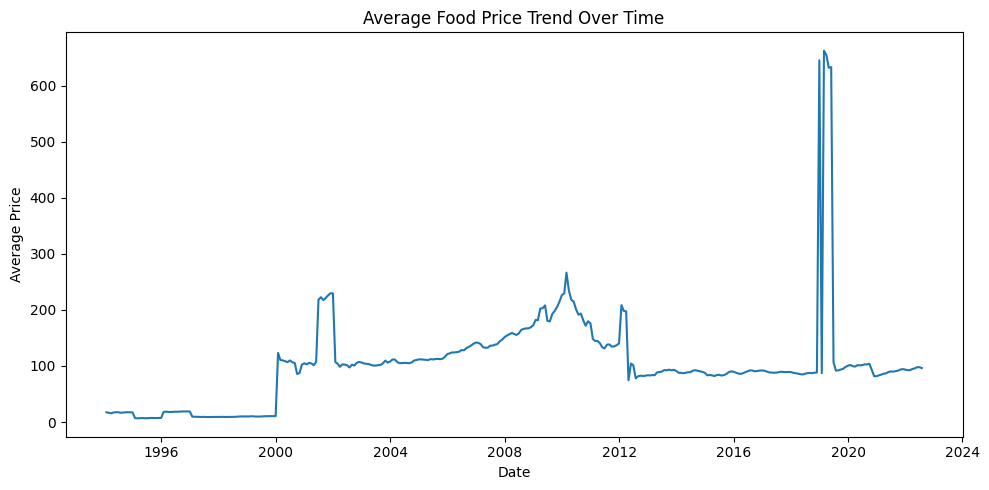

In [13]:
monthly_avg = df.groupby(pd.Grouper(key='date', freq='M'))['price'].mean()
plt.figure(figsize=(10,5))
plt.plot(monthly_avg)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average Food Price Trend Over Time')
plt.tight_layout()
plt.show()

Food inflation is often driven by price volatility rather than steady growth.<br>
Some food items experience sharp fluctuations due to seasonality or supply shocks.<br>

In [15]:
volatility = df.groupby('commodity')['price'].std().sort_values(ascending=False)
volatility.head(10)

,price
commodity,
Rice,540.252479
Sugar,495.968598
Wheat,468.691603
Tea (black),66.274217
Oil (mustard),46.972443
Oil (sunflower),37.725575
Ghee (vanaspati),34.369506
Oil (soybean),34.119546
Oil (palm),32.397029


Different food categories behave differently in terms of price stability.<br>
Staple foods usually show lower volatility compared to perishables.<br>
Comparing categories helps identify key drivers of food inflation.<br>

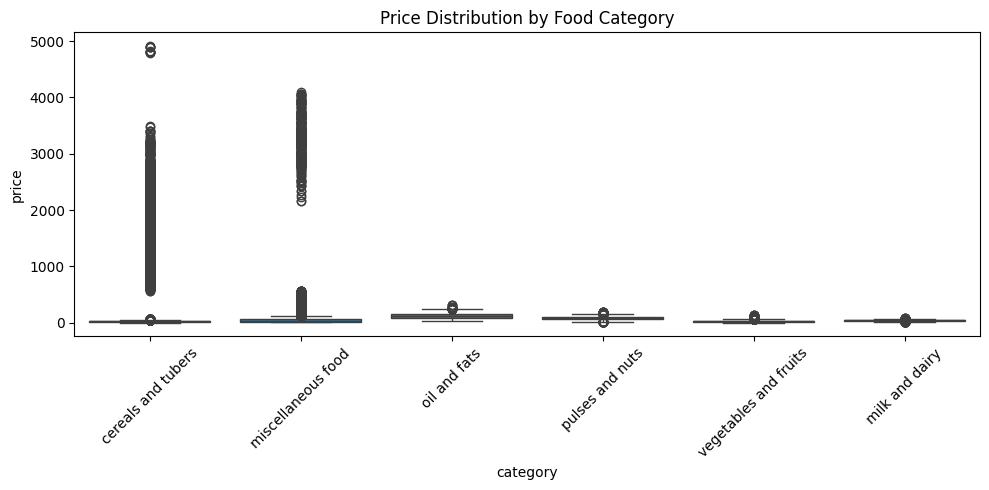

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='category', y='price', data=df)
plt.xticks(rotation=45)
plt.title('Price Distribution by Food Category')
plt.tight_layout()
plt.show()


This project analyzed food price data to understand inflation behavior in India.<br>